In [1]:
### Error/Trend/Seasonality Models


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [14]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [15]:
airline.dropna(inplace=True)

In [16]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

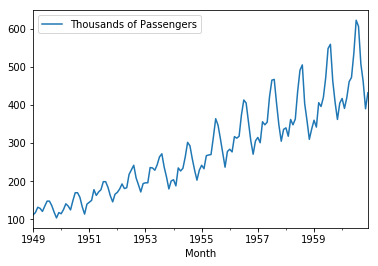

In [17]:
airline.plot()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

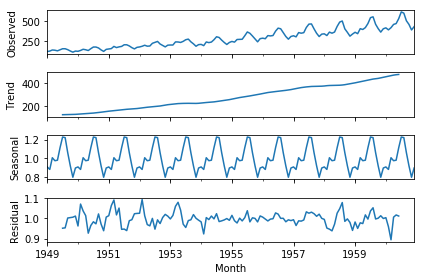

In [19]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

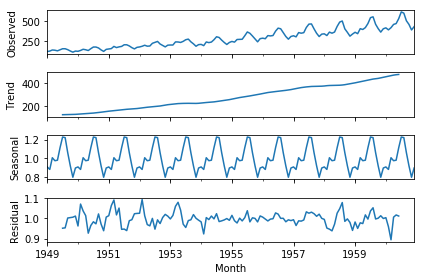

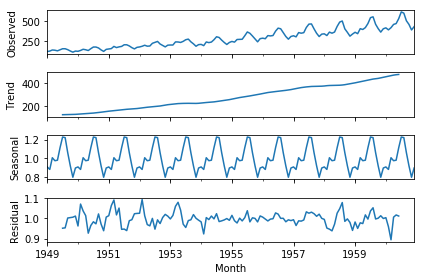

In [26]:
result.plot()

In [27]:
#simple Moving Average


In [29]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()

In [30]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()

In [31]:
airline.head()

Thousands of Passengers  6-month-SMA  12-month-SMA
Month                                                         
1949-01-01                      112          NaN           NaN
1949-02-01                      118          NaN           NaN
1949-03-01                      132          NaN           NaN
1949-04-01                      129          NaN           NaN
1949-05-01                      121          NaN           NaN

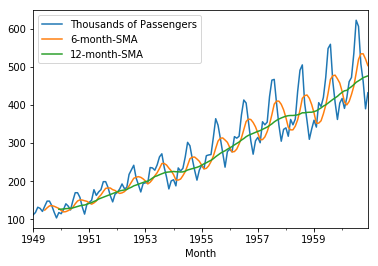

In [32]:
airline.plot()

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:

Smaller windows will lead to more noise, rather than signal
It will always lag by the size of the window
It will never reach to full peak or valley of the data due to the averaging.
Does not really inform you about possible future behavior, all it really does is describe trends in your data.
Extreme historical values can skew your SMA significantly

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size

In [33]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

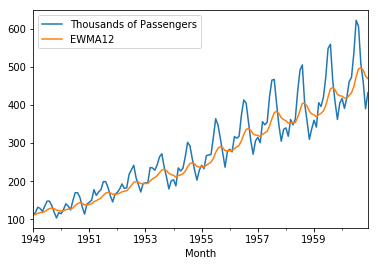

In [34]:
airline[['Thousands of Passengers','EWMA12']].plot();

In [35]:
#Comparing SMA to EWMA

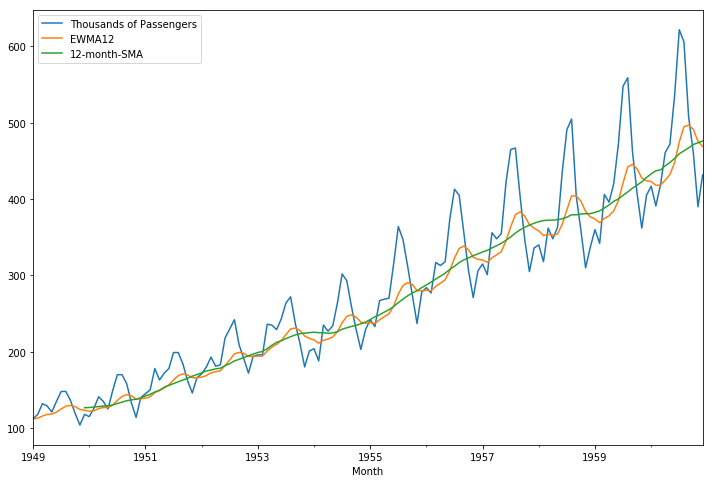

In [36]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

Simple Exponential Smoothing
The above example employed Simple Exponential Smoothing with one smoothing factor Œ±. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. In the next section we'll look at Double and Triple Exponential Smoothing with the Holt-Winters Methods.

# Exponentially Weighted Moving Averages (EWMA) we applied Simple Exponential Smoothing using just one smoothing factor  ùõº  (alpha). This failed to account for other contributing factors like trend and seasonality.

# Double and Triple Exponential Smoothing with the Holt-Winters Methods.

In Double Exponential Smoothing (aka Holt's Method) we introduce a new smoothing factor  ùõΩ  (beta) that addresses trend:

With Triple Exponential Smoothing (aka the Holt-Winters Method) we introduce a smoothing factor  ùõæ  (gamma) that addresses seasonality:



In [41]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [43]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [39]:
#set datetime index a frequency

In [45]:
df.index.freq = 'MS'

In [46]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [47]:
#simple exp smoothing

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [49]:
span = 12
alpha = 2/(span+1)

In [50]:

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

Thousands of Passengers      EWMA12       SES12
Month                                                      
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor  ùõº  (alpha), Double Exponential Smoothing adds a second smoothing factor  ùõΩ  (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ( 0<ùõΩ‚â§1 ). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential (curved) trend, you would use a multiplicative adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require damping that reduces the size of the trend over future periods until it reaches a flat line.

In [52]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  114.336774
1949-02-01                      118  112.923077  112.923077  120.336774
1949-03-01                      132  115.857988  115.857988  134.336774
1949-04-01                      129  117.879836  117.879836  131.336774
1949-05-01                      121  118.359861  118.359861  123.336774

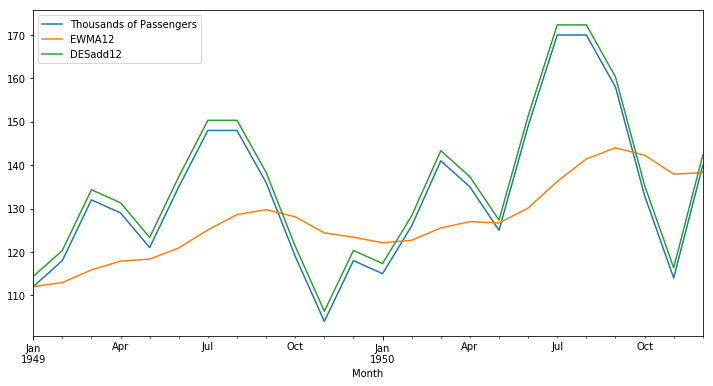

In [53]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
#Let's see if using a multiplicative seasonal adjustment helps

In [56]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12  
Month                   
1949-01-01  112.049247  
1949-02-01  118.051885  
1949-03-01  132.058041  
1949-04-01  129.056722  
1949-05-01  121.053204

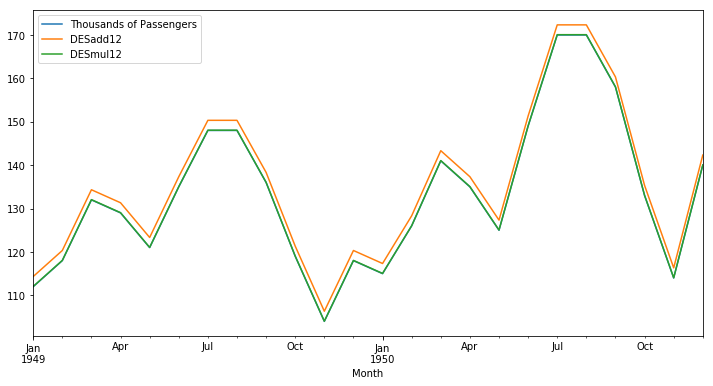

In [57]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Triple Exponential Smoothing¬∂
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [61]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12    TESmul12    TESadd12  
Month                                           
1949-01-01  112.049247  111.753654  113.081280  
1949-02-01  118.051885  118.993207  120.550730  
1949-03-01  132.058041  133.458671  135.527373  
1949-04-01  129.056722  127.957617  133.155127  
1949-05-01  121.053204  121.027379  125.656203

In [62]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12    TESmul12    TESadd12  
Month                                           
1949-01-01  112.049247  111.753654  113.081280  
1949-02-01  118.051885  118.993207  120.550730  
1949-03-01  132.058041  133.458671  135.527373  
1949-04-01  129.056722  127.957617  133.155127  
1949-05-01  121.053204  121.027379  125.656203

In [63]:
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12    TESmul12    TESadd12  
Month                                           
1949-01-01  112.049247  111.753654  113.081280  
1949-02-01  118.051885  118.993207  120.550730  
1949-03-01  132.058041  133.458671  135.527373  
1949-04-01  129.056722  127.957617  133.155127  
1949-05-01  121.053204  121.027379  125.656203

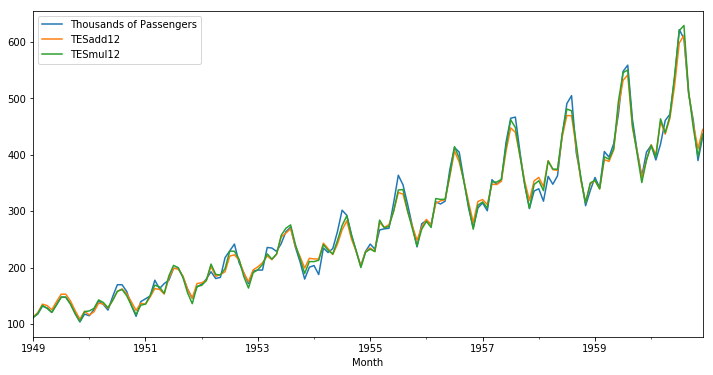

In [64]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

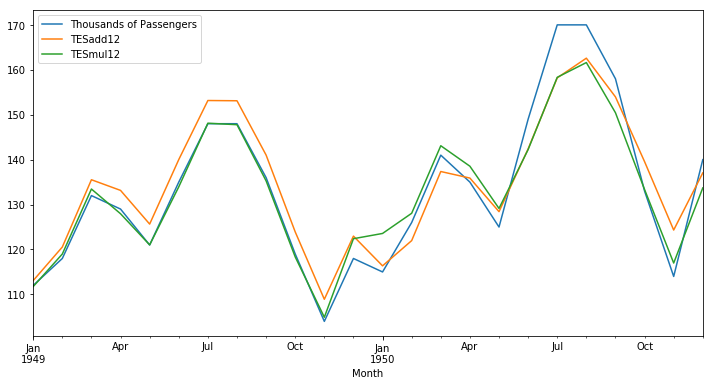

In [65]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [70]:
nbmerge 01-ETS-Decomposition.ipynb7 02-EWMA-Exponentially-Weighted-Moving-Average.ipynb 03-Holt-Winters-Methods.ipynb291 > merged.ipynb


SyntaxError: invalid token (<ipython-input-70-540078f4d45a>, line 1)